In [123]:
import pandas as pd
import numpy as np
import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

import seaborn as sns
import matplotlib.pyplot as plt

from nlp_cleaning import *
from modeling import *

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
df = pd.read_csv("Reviews_cleaned_for_NLP.csv")
df.columns

Index(['attraction_name', 'attraction_id', 'user_name', 'user_profile_link',
       'review_date', 'helpful_votes', 'rating', 'review_link', 'review_text',
       'review_title', 'experience_date', 'reviews_basic_clean',
       'review_lemma', 'review_remove_stop_words',
       'review_remove_additional_words', 'review_pos_ent_filter'],
      dtype='object')

## Vectorizer & Topic Modeling - Round 1

The cleaned corpus is used for for creating a bag of words with TF-IDF
This will then be used for topic modeling.

In [152]:
df['review_clean_modeling'] = df['review_remove_additional_words']
topics_list = []

In [153]:
vectorizer = CountVectorizer(max_features=20000, min_df = 10, max_df = 0.5, ngram_range = (1, 2), binary=True)

doc_word = vectorizer.fit_transform(df.review_clean_modeling)
words = list(np.asarray(vectorizer.get_feature_names()))

doc_word.shape

(10725, 5472)

In [141]:
topic_model = ct.Corex(n_hidden=25, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs = df.review_text)

topic_model.tc

12.57988909906476

In [66]:
# Print a single topic from CorEx topic model
topic_model.get_topics(topic=11, n_words=10)

[('spend', 0.11076850275510405),
 ('day', 0.059936227519525424),
 ('shop', 0.053432243650766),
 ('visitor', 0.04250712545845151),
 ('gift', 0.03710155219179291),
 ('gift shop', 0.035207706606604695),
 ('ranger', 0.030100408820825743),
 ('center', 0.030067707239215154),
 ('visitor center', 0.029916602679831462),
 ('wait', 0.029352227151842693)]

In [67]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: mist, step, mist trail, muir, john muir, john, muir trail, steep, wet, slippery
1: tree, grove, giant, sequoia, mariposa, mariposa grove, tram, giant sequoia, grizzly, grizzly giant
2: half dome, dome, half, el, capitan, el capitan, tioga, tioga pass, lake, view half
3: fall, water, yosemite fall, falls, low, low fall, upper, bridge, flow, dry
4: cable, permit, glove, bring, sub dome, sub, need, lottery, shape, height
5: point, glacier point, glacier, drive glacier, view glacier, point view, vantage point, vantage, sentinel dome, sentinel
6: vernal, vernal fall, nevada, nevada fall, nevada falls, round trip, round, hike vernal, vernal nevada, trail vernal
7: drive, park, national, national park, road, yosemite national, car, yosemite, car park, worth drive
8: parking, early, shuttle, parking lot, bus, morning, early morning, shuttle bus, crowd, free
9: start, people, elevation, gain, break, switchback, trailhead, elevation gain, hiker, rock
10: trail, trail not, mile trail, fall tra

In [24]:
# Note, instead of using .predict(doc_word), you can also call topic_model.labels
predictions = pd.DataFrame(topic_model.predict(doc_word), columns=['topic'+str(i) for i in range(20)])
predictions

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,True,True,True,False,True,False,True,True,True,False,False,True,False,True,True,True,True,False,True,True
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,True,True,True,True,True,False,False,True,False,False,True,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
6971,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
6972,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
6973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [68]:
topic_model.get_top_docs(topic = 1)

[('You will feel as if you are in the Jurassic park.Yosemite is a must visit place .A visit of lifetime.When the tram tour was taking us thru the mariposa grove the feelings was indescribable.Some tree trunks are as wide as a bungalow. Some trunks caught fire and a huge tree cave is formed A  big truck can also pass thru the trunk',
  0.0),
 ("Well worth the time if you are entering/exiting Yosemite through this entrance.  The easy but uphill walk to the lower grove is marked with information signs, also use the pamphlet for more information.  You will see a couple of the larger sequoia trees, but they are just a taste of what can be seen in King's Canyon and Sequoia National Parks.  We didn't have time to walk all the way to the upper grove area, but other visitors used the tram.",
  0.0),
 ("My family was fortunate enough to visit Yosemite right after the Mariposa Grove reopened to visitors and we enjoyed it so much. The trees are spectacular and not like anything I've seen before. T

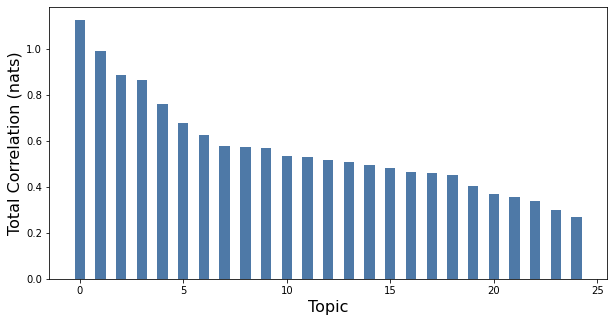

In [118]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)
plt.show()

In [158]:
anchor_words = [['amazing', 'view', 'awe', 'inspire'], ['strenous', 'not easy', 'strenuous', 'strenuous hike', 'steep hike', 'steep', 'steep climb'],\
                ['easy hike', 'short hike', 'easy walk', 'short walk', 'walk trail' ], ['waterfall',], ['sunset'], ['permit', 'lottery'],\
                ['eat' , 'food'], ['scenic drive', 'driving'],  ['wildlife' , 'animal', 'cub', 'bear cub'], ['lake',] , ['photo'], \
                ['not miss','definite', 'visit', 'recommend visit', 'highly recommend'], ['night', 'sky', 'star', 'night sky'], \
                ['bring', 'water'], ['shuttle', 'bus', 'shuttle stop', 'bus stop', ], ['tour bus', 'bus tour',], \
                ['rock climb', 'cable climb',  ] ]

topic_model_anc = ct.Corex(n_hidden=20, words=words, seed=1)
topic_model_anc.fit(doc_word, words=words, docs = df.review_text, anchors = anchor_words, anchor_strength = 4)
print(topic_model_anc.tc)
print(topic_model_anc.tcs)

23.770541858572273
[2.63053894 2.6121351  1.06802947 1.20109604 0.70947026 1.40921312
 0.65923547 1.04990966 0.92665478 0.93936894 1.04178709 1.55268812
 0.61968801 2.16945495 1.50607112 0.83851701 0.65877713 0.88870533
 0.60342043 0.68578088]


topics = ['Breathtaking Views', 'Difficult Hikes', 'Trails for Walking', 'Stunning Waterfalls', 'Sunset Recommendations',
	  'Permit Necessities', 'Pack Food', 

In [163]:
import pickle

with open ("corex_topic_model_anchor.pickle", "wb") as model:
    pickle.dump(topic_model_anc, model)

In [160]:
# Print all topics from the CorEx topic model
topics = topic_model_anc.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))
    try:
        print(f"Anchore Words: {anchor_words[n]}")
    except:
        print("No more anchor words")
    print(f"TC Score: {topic_model_anc.tcs[n]}")    
    for each_doc in topic_model_anc.get_top_docs(topic = n, n_docs=5):
        print("Review: ", each_doc[0])
    print("\n")

0: view, great view, inspire, view fall, amazing view, good view, amazing, beautiful view, spectacular view, view amazing
Anchore Words: ['amazing', 'view', 'awe', 'inspire']
TC Score: 2.6305389445173106
Review:  Not too many ppl when we arrive at 3pm, probably because they are controlling visitor per day in national park. Smoke was not crazy today, view was okay. -Oct 16 2020
Review:  Maybe you've seen lots of photos of Tunnel View. It's not possible to imagine how breathtaking it is until you cross the tunnel and stop to stare this dramatic view of the valley.
Review:  What a view....I could stand there for hours!!!Easy to find, easy to park...Plenty of space to walk around and take your pictures (don't forget your tripod)!You have almost everything in front of you (Half- Dome,Bridalveil fall, El Capitan)!!!
Review:  Immediately upon exiting the tunnel you're presented with this stunning location and view of the Yosemite valley. There's a small car park available and specific photo o

In [24]:
# Note, instead of using .predict(doc_word), you can also call topic_model.labels
predictions = pd.DataFrame(topic_model.predict(doc_word), columns=['topic'+str(i) for i in range(20)])
predictions

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,True,True,True,False,True,False,True,True,True,False,False,True,False,True,True,True,True,False,True,True
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,True,True,True,True,True,False,False,True,False,False,True,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True
6971,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
6972,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
6973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
